In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/Hp/Downloads/adme_reduced_data.csv")

In [3]:
data

,LogP,LogS,LogD,Pgp-inh,Pgp-sub,HIA,F(20%),F(30%),Caco-2,MDCK,...,Fsp3,Natural Product-likeness,Alarm_NMR,BMS,Chelating,PAINS,Lipinski_encoded,Pfizer_encoded,GSK_encoded,GoldenTriangle_encoded
0,2.560,-3.578,1.561,0.001,0.020,0.036,0.006,0.249,-5.724,0.00001,...,0.545,-0.164,2,1,0,0,1,1,0,1
1,-0.466,1.064,-0.235,0.000,0.034,0.006,0.002,0.004,-4.250,0.00003,...,0.500,0.957,1,1,0,0,1,1,1,0
2,2.156,-3.615,1.346,0.002,0.006,0.078,0.009,0.008,-5.850,0.00000,...,0.526,-0.032,2,0,0,0,1,1,1,1
3,2.208,-3.490,1.289,0.002,0.006,0.574,0.020,0.721,-5.994,0.00000,...,0.526,-0.181,3,0,0,0,1,1,0,1
4,2.349,-3.013,1.988,0.004,0.991,0.041,0.007,0.002,-5.555,0.00001,...,0.600,-1.218,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,2.686,-3.422,3.302,0.001,0.002,0.005,0.033,0.000,-4.690,0.00058,...,1.000,-0.317,0,0,0,0,1,1,1,1
1735,1.955,-2.234,2.142,0.289,0.039,0.006,0.833,0.893,-4.716,0.00002,...,0.500,-0.589,2,0,0,0,1,1,1,1
1736,3.609,-3.320,3.308,0.003,0.000,0.003,0.006,0.049,-4.367,0.00003,...,0.600,0.343,0,0,0,0,1,0,1,1
1737,3.091,-3.401,3.886,0.000,0.001,0.006,0.022,0.001,-4.399,0.00036,...,1.000,-0.086,0,0,0,0,1,1,1,1


In [4]:
data.isnull().sum()

LogP                      0
LogS                      0
LogD                      0
Pgp-inh                   0
Pgp-sub                   0
                         ..
PAINS                     0
Lipinski_encoded          0
Pfizer_encoded            0
GSK_encoded               0
GoldenTriangle_encoded    0
Length: 82, dtype: int64

In [5]:
print(data.isnull().any().any())

False


In [6]:
data.duplicated().sum()

0

In [7]:
data.shape

(1739, 82)

In [8]:
np.any(np.isinf(data)).sum() # Checks for infinity
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [9]:
print(data.isnull().any().any())

False


In [10]:
x=data.drop("LogP",axis=1)

In [11]:
y=data["LogP"]

In [12]:
above1=x.columns[(x > 1).any()].tolist()
print(above1)

['LogS', 'LogD', 'PPB', 'VDss', 'Fu', 'CL', 'BCF', 'IGC50', 'LC50', 'LC50DM', 'MW', 'Vol', 'Dense', 'nRing', 'MaxRing', 'fChar', 'nRig', 'Flex', 'nStereo', 'NonBiodegradable', 'NonGenotoxic_Carcinogenicity', 'SureChEMBL', 'LD50_oral', 'Skin_Sensitization', 'Acute_Aquatic_Toxicity', 'Toxicophores', 'Genotoxic_Carcinogenicity_Mutagenicity', 'Synth', 'Natural Product-likeness', 'Alarm_NMR', 'BMS', 'Chelating', 'PAINS']


In [13]:
below0=x.columns[(x < 0).any()].tolist()
print(below0)

['LogS', 'LogD', 'Caco-2', 'PPB', 'VDss', 'CL', 'BCF', 'LC50', 'fChar', 'Natural Product-likeness']


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

In [15]:
# All the below0 cols contains max value above 1, hence standardizing only the cols of above1 and below0 list
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train[['LogS', 'LogD', 'PPB', 'Caco-2','VDss', 'Fu', 'CL', 'BCF', 'IGC50', 'LC50', 'LC50DM', 'MW', 'Vol', 'Dense', 'nRing', 'MaxRing', 'fChar', 'nRig', 'Flex', 'nStereo', 'NonBiodegradable', 'NonGenotoxic_Carcinogenicity', 'SureChEMBL', 'LD50_oral', 'Skin_Sensitization', 'Acute_Aquatic_Toxicity', 'Toxicophores', 'Genotoxic_Carcinogenicity_Mutagenicity', 'Synth', 'Natural Product-likeness', 'Alarm_NMR', 'BMS', 'Chelating', 'PAINS']
])

In [16]:
x_scaled_test=scaler.transform(x_test[['LogS', 'LogD', 'PPB', 'Caco-2','VDss', 'Fu', 'CL', 'BCF', 'IGC50', 'LC50', 'LC50DM', 'MW', 'Vol', 'Dense', 'nRing', 'MaxRing', 'fChar', 'nRig', 'Flex', 'nStereo', 'NonBiodegradable', 'NonGenotoxic_Carcinogenicity', 'SureChEMBL', 'LD50_oral', 'Skin_Sensitization', 'Acute_Aquatic_Toxicity', 'Toxicophores', 'Genotoxic_Carcinogenicity_Mutagenicity', 'Synth', 'Natural Product-likeness', 'Alarm_NMR', 'BMS', 'Chelating', 'PAINS']
])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(x_scaled_train,y_train)
prediction=lr.predict(x_scaled_test)
print("The R^2 score is:", metrics.r2_score(y_test, prediction)) 
print("The Mean Squared Error (MSE) is:", metrics.mean_squared_error(y_test, prediction)) 
print("The Mean Absolute Error (MAE) is:", metrics.mean_absolute_error(y_test, prediction))

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

The R^2 score is: 0.8427512807994587
The Mean Squared Error (MSE) is: 0.7415189364616784
The Mean Absolute Error (MAE) is: 0.5742222170449744
Coefficients: [-2.59740803e-01  1.50296567e+00  1.93086968e-01  2.16940930e-01
  7.03906457e-02 -9.80675576e-02 -1.18095808e-01 -1.28877505e-02
  1.50001732e-01 -2.94695174e-04 -9.39141366e-02  4.70453729e-01
 -6.17323326e-02 -8.84725157e-03  2.18948120e-01  3.97499486e-03
  2.05386525e-02 -4.75991138e-01 -5.47933265e-02 -1.75539996e-01
  1.58106548e-02  4.47762738e-02  4.97105309e-02 -6.89057004e-03
  9.52609442e-03 -3.56608655e-02 -5.06418222e-02  4.83965135e-02
  3.14128330e-03  9.89731423e-02 -1.69932923e-03 -2.67670135e-02
  7.12674881e-02  2.51158015e-02]
Intercept: 2.4135204888569377


Text(0.5, 1.0, 'Predicted vs Actual with best fit line of the data')

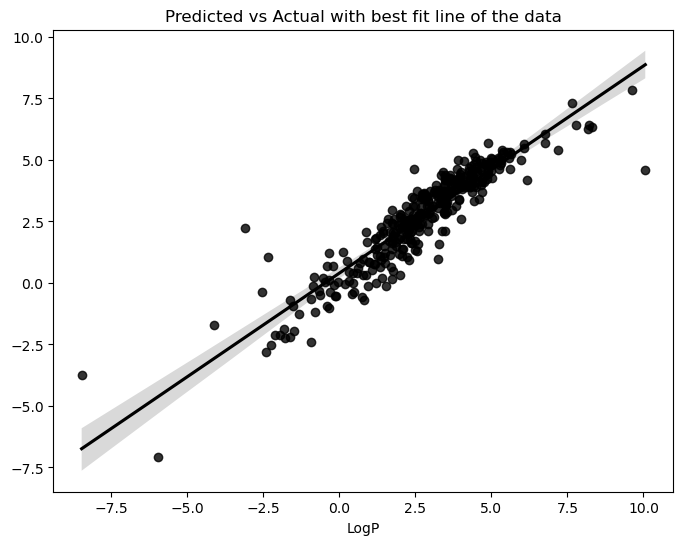

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=prediction, color='black', label='Predicted vs Actual')
plt.title('Predicted vs Actual with best fit line of the data')


### polynomial reg

In [19]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature


# Create a polynomial regression model
model = LinearRegression()
# Fit the model to the data
model.fit(x_scaled_train, y_train)
 
# Predict the response for a new data point
prediction = model.predict(x_scaled_test)

print("The R^2 score is:", metrics.r2_score(y_test, prediction)) 
print("The Mean Squared Error (MSE) is:", metrics.mean_squared_error(y_test, prediction)) 
print("The Mean Absolute Error (MAE) is:", metrics.mean_absolute_error(y_test, prediction))

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

The R^2 score is: 0.8427512807994587
The Mean Squared Error (MSE) is: 0.7415189364616784
The Mean Absolute Error (MAE) is: 0.5742222170449744
Coefficients: [-2.59740803e-01  1.50296567e+00  1.93086968e-01  2.16940930e-01
  7.03906457e-02 -9.80675576e-02 -1.18095808e-01 -1.28877505e-02
  1.50001732e-01 -2.94695174e-04 -9.39141366e-02  4.70453729e-01
 -6.17323326e-02 -8.84725157e-03  2.18948120e-01  3.97499486e-03
  2.05386525e-02 -4.75991138e-01 -5.47933265e-02 -1.75539996e-01
  1.58106548e-02  4.47762738e-02  4.97105309e-02 -6.89057004e-03
  9.52609442e-03 -3.56608655e-02 -5.06418222e-02  4.83965135e-02
  3.14128330e-03  9.89731423e-02 -1.69932923e-03 -2.67670135e-02
  7.12674881e-02  2.51158015e-02]
Intercept: 2.4135204888569377


Text(0.5, 1.0, 'Predicted vs Actual with best fit line of the data')

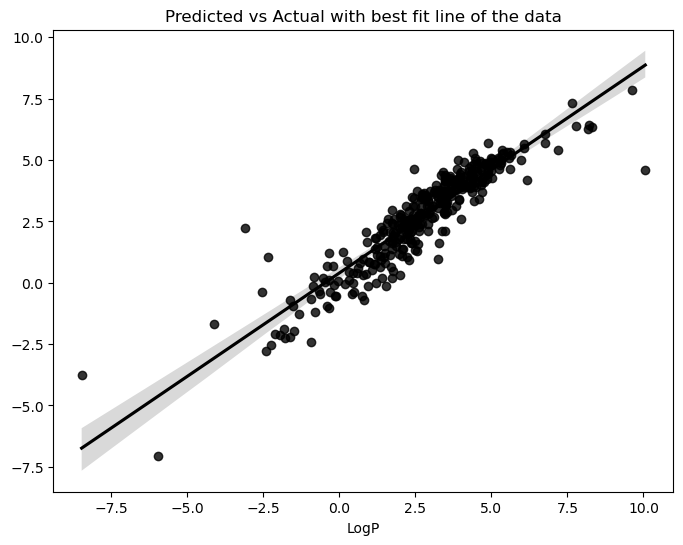

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=prediction, color='black', label='Predicted vs Actual')
plt.title('Predicted vs Actual with best fit line of the data')


### decision tree reg

In [21]:
from sklearn.tree import DecisionTreeRegressor
 
# Create a decision tree regression model
model = DecisionTreeRegressor()
 
# Fit the model to the data
model.fit(x_scaled_train, y_train)
 
# Predict the response for a new data point
prediction = model.predict(x_scaled_test)

print("The R^2 score is:", metrics.r2_score(y_test, prediction)) 
print("The Mean Squared Error (MSE) is:", metrics.mean_squared_error(y_test, prediction)) 
print("The Mean Absolute Error (MAE) is:", metrics.mean_absolute_error(y_test, prediction))



The R^2 score is: 0.8109201848648937
The Mean Squared Error (MSE) is: 0.8916210201149425
The Mean Absolute Error (MAE) is: 0.678462643678161


Text(0.5, 1.0, 'Predicted vs Actual with best fit line of the data')

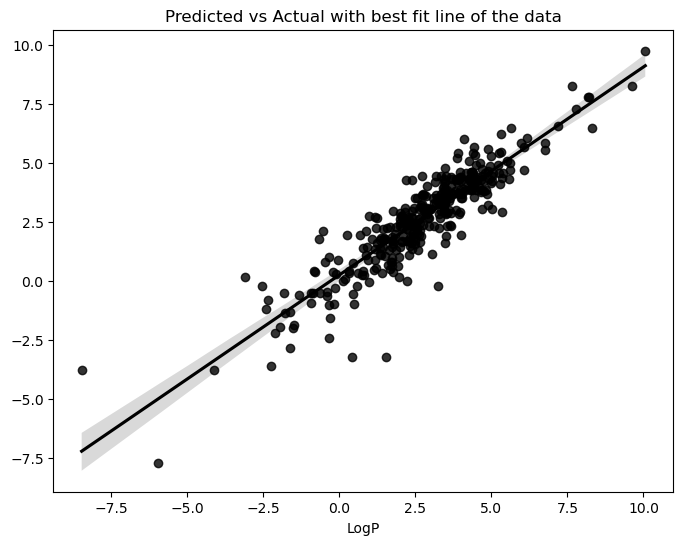

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=prediction, color='black', label='Predicted vs Actual')
plt.title('Predicted vs Actual with best fit line of the data')


### random forest reg+ gradient boost= 0.90 accuarcy

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor
# Create individual regression models
rf_model = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_depth=20, random_state=43)
gb_model = GradientBoostingRegressor(n_estimators=500, max_depth=3, random_state=43)

# Cross-validate Random Forest
scores = cross_val_score(rf_model, x, y, cv=5)
print("Cross-validation scores for Random Forest:", scores)

# Fit the individual models
rf_model.fit(x_scaled_train, y_train)
gb_model.fit(x_scaled_train, y_train)

# Predict and evaluate Random Forest
rf_predictions = rf_model.predict(x_scaled_test)
print("The R^2 score of Random Forest on test data is:", metrics.r2_score(y_test, rf_predictions))

gb_predictions = gb_model.predict(x_scaled_test)
print("The R^2 score of gradient boosting on test data is:", metrics.r2_score(y_test, gb_predictions))

# Create a voting regressor to combine both models
voting_model = VotingRegressor(estimators=[
    ('rf', rf_model),  # Random Forest model
    ('gb', gb_model)   # Gradient Boosting model
])

# Fit the combined model to the training data
voting_model.fit(x_scaled_train, y_train)

# Predict and evaluate the voting model
voting_predictions = voting_model.predict(x_scaled_test)

print("The R^2 score of voting model on test data is:", metrics.r2_score(y_test, voting_predictions))
print("The Mean Squared Error (MSE) of voting model on test data is:", metrics.mean_squared_error(y_test, voting_predictions))
print("The Mean Absolute Error (MAE) of voting model on test data is:", metrics.mean_absolute_error(y_test, voting_predictions))


Cross-validation scores for Random Forest: [0.8619932  0.91496094 0.88400743 0.90402054 0.88627517]
The R^2 score of Random Forest on test data is: 0.8934447144531037
The R^2 score of gradient boosting on test data is: 0.9021753912770956
The R^2 score of voting model on test data is: 0.9059032832895793
The Mean Squared Error (MSE) of voting model on test data is: 0.4437206080557178
The Mean Absolute Error (MAE) of voting model on test data is: 0.45275777607090106


### RF+XGboost =0.90

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Create individual regression models
rf_model = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_depth=20, random_state=43)
gb_model =  XGBRegressor(n_estimators=500, max_depth=3, random_state=43)

# Cross-validate Random Forest
scores = cross_val_score(rf_model, x, y, cv=5)
print("Cross-validation scores for Random Forest:", scores)

# Fit the individual models
rf_model.fit(x_scaled_train, y_train)
gb_model.fit(x_scaled_train, y_train)

# Predict and evaluate Random Forest
rf_predictions = rf_model.predict(x_scaled_test)
print("The R^2 score of Random Forest on test data is:", metrics.r2_score(y_test, rf_predictions))

gb_predictions = gb_model.predict(x_scaled_test)
print("The R^2 score of gradient boosting on test data is:", metrics.r2_score(y_test, gb_predictions))

# Create a voting regressor to combine both models
base_model = StackingRegressor(estimators=[
    ('rf', rf_model),  # Random Forest model
    ('gb', gb_model)  # Gradient Boosting model
],final_estimator=LinearRegression())

# Fit the combined model to the training data
base_model.fit(x_scaled_train, y_train)

# Predict and evaluate the voting model
base_predictions = base_model.predict(x_scaled_test)

print("The R^2 score of base model on test data is:", metrics.r2_score(y_test, base_predictions))
print("The Mean Squared Error (MSE) of base model on test data is:", metrics.mean_squared_error(y_test, base_predictions))
print("The Mean Absolute Error (MAE) of base model on test data is:", metrics.mean_absolute_error(y_test, base_predictions))


Cross-validation scores for Random Forest: [0.8619932  0.91496094 0.88400743 0.90402054 0.88627517]
The R^2 score of Random Forest on test data is: 0.8934447144531037
The R^2 score of gradient boosting on test data is: 0.8947840840245376
The R^2 score of base model on test data is: 0.9055292528771925
The Mean Squared Error (MSE) of base model on test data is: 0.4454843784381246
The Mean Absolute Error (MAE) of base model on test data is: 0.44743060293212233


Text(0.5, 1.0, 'Predicted vs Actual with best fit line of the data (RF+xgboost)')

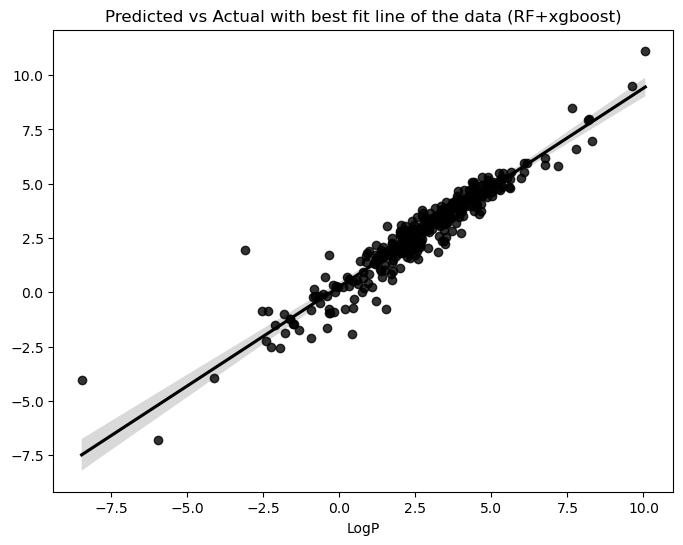

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=base_predictions, color='black', label='Predicted vs Actual')
plt.title('Predicted vs Actual with best fit line of the data (RF+xgboost)')


### lasso

In [27]:
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(alpha=0.001)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_scaled_train,y_train)
#Predicting for X_test
prediction =lasso_reg.predict(x_scaled_test)
#Printing the Score with RMLSE
print("The R^2 score is:", metrics.r2_score(y_test, prediction)) 
print("The Mean Squared Error (MSE) is:", metrics.mean_squared_error(y_test, prediction)) 
print("The Mean Absolute Error (MAE) is:", metrics.mean_absolute_error(y_test, prediction))

The R^2 score is: 0.8444495360909146
The Mean Squared Error (MSE) is: 0.7335106775457202
The Mean Absolute Error (MAE) is: 0.5726256452360308


Text(0.5, 1.0, 'Predicted vs Actual with best fit line of the data (RF+xgboost)')

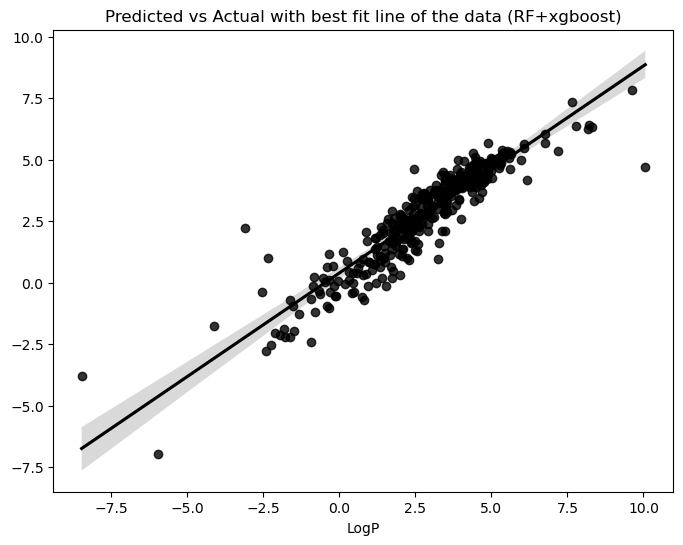

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=prediction, color='black', label='Predicted vs Actual')
plt.title('Predicted vs Actual with best fit line of the data (RF+xgboost)')


In [29]:
#data.to_csv("C:/Users/Hp/Downloads/ADME_preprocessed_data.csv")